<a href="https://colab.research.google.com/github/ascle/colab_tcc2/blob/main/3_visualiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Conectando no ambiente que será utilizado

In [ ]:
# Importando do Drive
from google.colab import drive
from os import chdir

drive.mount('/content/drive', force_remount=True)
chdir('/content/drive/MyDrive/UFS/tcc-2-ascle-ufs/bases/linkage_marco/')

Mounted at /content/drive


### Outras configurações



In [ ]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

### Leitura dos dados

In [ ]:
dados = pd.read_csv('dn_etl.csv', sep=';', low_memory=False)
dados.sort_index(axis=1, inplace=True)

In [ ]:
dados.shape

(192484, 24)

In [ ]:
dados.head()

,ANO,APGAR1,APGAR5,CODANOMAL_QTD,CONSPRENAT,ESCMAEETL_VALOR,ESTCIVMAE_COMPANHEIRO,GRAVIDEZ_VALOR,LOCNASC_DOMICILIO,LOCNASC_ESTAB_SAUDE,LOCNASC_HOSPITAL,LOCNASC_OUTROS,OBT_NEONATAL,PARTO_CESAREO,PARTO_VAGINALL,PESO,QTDFILMORT,QTDPARTCES,SEMAGESTAC,SEXO_FEM,SEXO_MASC,TPAPRESENT_CEFALICO,TPAPRESENT_PELVICO,TPAPRESENT_TRANSVERSA
0,2015,2.0,4.0,0.0,5.0,1,0,1,0,0,1,0,0,1,0,820.0,1.0,NaN,26.0,0,1,1,0,0
1,2015,9.0,10.0,0.0,8.0,4,1,1,0,0,1,0,0,1,0,4200.0,1.0,NaN,39.0,0,1,1,0,0
2,2015,7.0,8.0,0.0,10.0,11,1,1,0,0,1,0,0,0,1,3700.0,0.0,0.0,40.0,1,0,1,0,0
3,2015,7.0,8.0,0.0,7.0,4,0,1,0,0,1,0,0,0,1,3550.0,1.0,0.0,37.0,0,1,1,0,0
4,2015,9.0,10.0,0.0,3.0,11,0,1,0,0,1,0,0,1,0,3800.0,0.0,NaN,39.0,1,0,1,0,0


Separando a base de dados entre variáveis e target

In [ ]:
variaveis = dados.drop(columns=['ANO', 'OBT_NEONATAL'])
variaveis_quali = variaveis.drop(columns=['APGAR1', 'APGAR5', 'CODANOMAL_QTD', 'CONSPRENAT', 'ESCMAEETL_VALOR', 'PESO', 'QTDFILMORT', 'QTDPARTCES', 'SEMAGESTAC'])
variaveis_quant = variaveis [['APGAR1', 'APGAR5', 'CODANOMAL_QTD', 'CONSPRENAT', 'ESCMAEETL_VALOR', 'PESO', 'QTDFILMORT', 'QTDPARTCES', 'SEMAGESTAC']]
target = dados['OBT_NEONATAL']

Base de treino normalizada

In [ ]:
scaler = scaler = StandardScaler()
scaler.fit(variaveis_quant)
variaveis_quant_norm = scaler.transform(variaveis_quant)
variaveis_quant_norm = pd.DataFrame(data = variaveis_quant_norm, columns = variaveis_quant.keys())

### Visualização das variáveis

Gráfico de violino

In [ ]:
dados_plot = pd.concat([target, variaveis_quant_norm], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="OBT_NEONATAL", var_name="variáveis", value_name="valores")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'APGAR1'),
  Text(1, 0, 'APGAR5'),
  Text(2, 0, 'CODANOMAL_QTD'),
  Text(3, 0, 'CONSPRENAT'),
  Text(4, 0, 'ESCMAEETL_VALOR'),
  Text(5, 0, 'PESO'),
  Text(6, 0, 'QTDFILMORT'),
  Text(7, 0, 'QTDPARTCES'),
  Text(8, 0, 'SEMAGESTAC')])

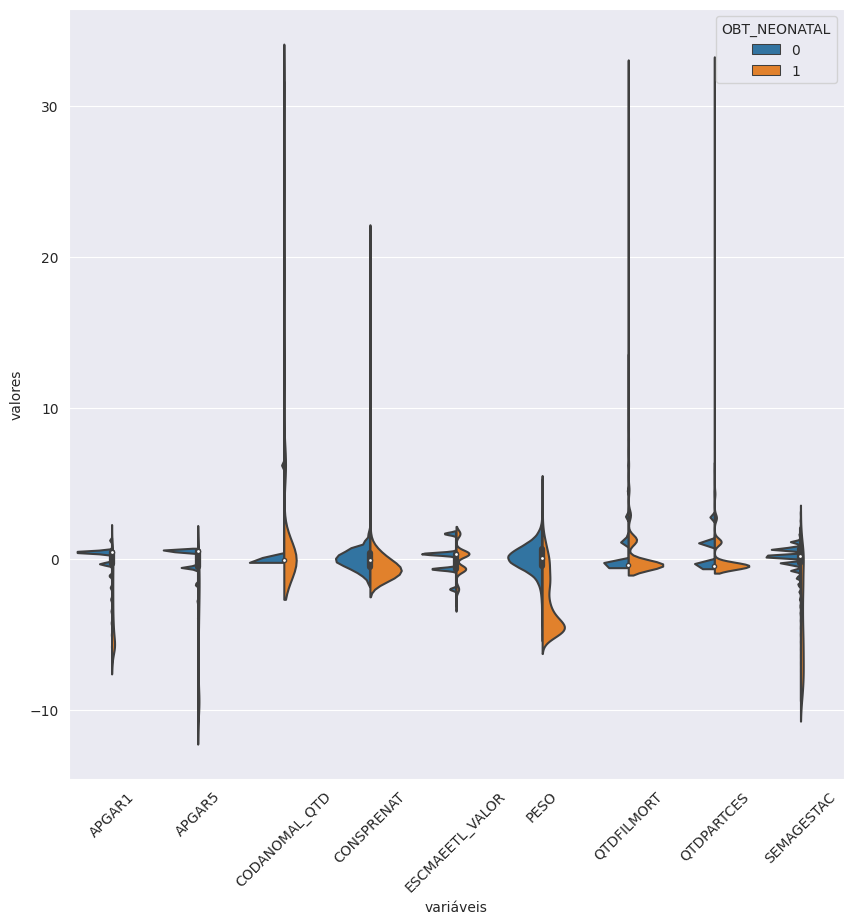

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x = "variáveis", y = "valores", hue = "OBT_NEONATAL", data = dados_plot, split=True)
plt.xticks(rotation = 45)

Matriz de correlação

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'APGAR1'),
  Text(1.5, 0, 'APGAR5'),
  Text(2.5, 0, 'CODANOMAL_QTD'),
  Text(3.5, 0, 'CONSPRENAT'),
  Text(4.5, 0, 'ESCMAEETL_VALOR'),
  Text(5.5, 0, 'PESO'),
  Text(6.5, 0, 'QTDFILMORT'),
  Text(7.5, 0, 'QTDPARTCES'),
  Text(8.5, 0, 'SEMAGESTAC')])

<Figure size 640x480 with 0 Axes>

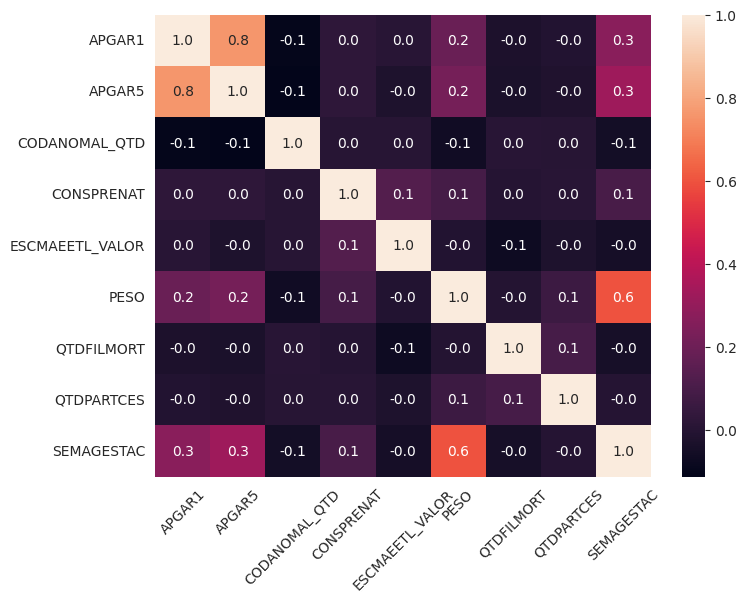

In [ ]:
matriz_correlacao = variaveis_quant_norm.corr()
plt.clf()
plt.figure(figsize = (8, 6))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")
plt.xticks(rotation = 45)

## Visualizações do target

[Text(0.5, 1.0, 'Recém-nascido'),
 Text(0.5, 0, 'Óbito'),
 Text(0, 0.5, 'Percentual')]

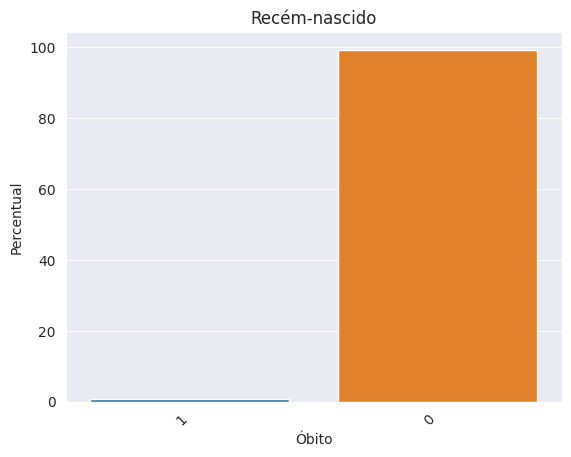

In [ ]:
porc = (dados['OBT_NEONATAL'].value_counts(normalize=True)).round(3)*100
dados_plot = pd.DataFrame({'Percentual': porc}).sort_values('Percentual')
ax = sns.barplot(dados_plot.transpose())
plt.xticks(rotation=45, ha='right');
ax.set(title='Recém-nascido', xlabel='Óbito', ylabel='Percentual')

In [ ]:
porc

0    99.3
1     0.7
Name: OBT_NEONATAL, dtype: float64

### Visualização target X vaiáveis